# Building our Neural Network

### Introduction

In the last lesson, we saw how to work with and format our image data using Pytorch.  In this lesson, we'll review what we learned so far, and then put the pieces together to train a neural network that can make predictions on these handwritten images.

## 0. Setting up our Environment

Ok, so in this lesson, we'll train our neural network.  Because we'll be using a lot of images to train our neural network, we can speed things up if we colab use the GPU, instead of the CPU it's currently using.  

> We don't need to understand why this is faster -- just know doing this now will save us a lot of time later on.

So to make the switch, you'll first need to go to the menu bar in Google Colab, and click on `Runtime` and then click on `change runtime type` and finally select `GPU` as shown in the images below.

> <img src="./change_runtime_type.png" width="30%">

From there, change the runtime type to GPU, and click on `Save` as seen below.

> <img src="./to_gpu.png" width="40%">

Ok, that's it!  Our environment is now in good shape for us to build and train a neural neural network.

## 1. Acquire the Data

So once again, as our first step, we'll need to download our data, which we can do by pressing `shift + return` on the cell below.

In [2]:
import tensorflow.keras as keras

(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

And then let's make sure that `X_train` still contains our digits.

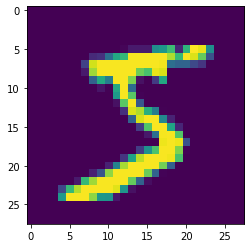

In [3]:
import matplotlib.pyplot as plt

plt.imshow(X_train[0])

Ok, so `X_train` contains our list of observations, where each observation is really a matrix and each entry in that matrix is the grayscale value of a pixel.  Now above, we also see `y_train`.  The variable `y_train` contains the corresponding labels of each image.  For example, let's take a look at the first three labels.

In [4]:
y_train[:3]

array([5, 0, 4], dtype=uint8)

> So notice that the first label in `y_train` is a 5, which matches our first image above.

## 2. Format and Reshape the Data

#### A. Converting the data

Ok, so we just downloaded our data.  Next up is to convert our data into the correct format.  We know that to feed our `X_train` data into a neural network, we need to convert it to be a tensor, and need the datatype to be type `float`.

Let's take care of that now.

In [5]:
import torch

X_train_tensor = torch.tensor(X_train).float()

We'll also need to convert our `y_train` data to be of type tensor, but will need that to be of type `long`.

> Long is Pytorch's version of an integer.  Remember that an integer is just a whole number without a decimal point.

In [6]:
y_train_tensor = torch.tensor(y_train).long()

#### B. Reshaping our Data

Ok, so now that our data is of the correct type, we'll still need to reshape the `X_train_tensor` data.  Currently, our tensor has the following shape:

In [7]:
X_train_tensor.shape

torch.Size([60000, 28, 28])

So we have 60,000 observations, where each observation is a $28x28$ grid.  But remember that we'll want to feed our observations into our neural network as a vector.  This is because our neural network starts with a linear layer, where we'll employ the dot product like so.

> $z(x) = x \cdot W + b =  w_1x_1 + w_2x_2 ... w_nx_n + b $

So we'll need each observation $x$ to be a vector that we can then dot with $W$, our weight matrix.  So, let's turn our observations from a list of matrices to a list of vectors with the following:

In [12]:
X_train_reshaped = X_train_tensor.view(60000, -1)

In [13]:
X_train_reshaped.shape

torch.Size([60000, 784])

> Ok, so by specifying we want our data to only be in two dimensions, and letting Pytorch calculate the length of each vector with the `-1`, we were able to reshape our data.

With that, our data should be good to go.  Let's build our neural network.

### 3. Building our Neural Network

So now it's time to construct our neural network.  Let's think about the different layers of the neural network that we'll need.  Remember that each observation $x$, is a vector of length 784 -- one feature for each pixel.  And remember that the first layer will have 64 neurons -- although the amount neurons we specify is flexible. Then we'll have our activation layer of the sigmoid function, followed by our last linear layer and output layer.  Because we want our neural network to predict the probability of our image being any one of ten outputs, we need ten neurons in that last linear layer.  And we'll use the softmax function as our output function so that the output is a probability where the most likely outcome is exaggerated.  

Mathematically, our neural network looks like the following:

$z_{1x64} = x_{1x784} \cdot W_{784x64} + b_{1x64}$

$a_{1x64} = \sigma(z_{1x64})$

$z_{1x10} = A_{1x64} \cdot W_{64x10} + b_{1x10}$

$a_{1x10} = \frac{e^z}{\sum e^z}$ 

> Take a second to see if you can explain the above -- considering the input and output of each layer.

And in Pytorch, we can construct this neural network with the following:

In [14]:
import torch.nn as nn

torch.manual_seed(5)

net = nn.Sequential(
    nn.Linear(784, 64),
    nn.Sigmoid(),
    nn.Linear(64, 10),
    nn.Softmax(dim = 0)
)

net

Sequential(
  (0): Linear(in_features=784, out_features=64, bias=True)
  (1): Sigmoid()
  (2): Linear(in_features=64, out_features=10, bias=True)
  (3): Softmax(dim=0)
)

### Making a Prediction

Ok, so we just created a neural network that will take in our tensors representing images.  Now before we train this neural network, let's make sure we undertand how it will predict what each image is.  We can see this by selecting our first image and passing it into our neural network.

> Below, we select our first image.

In [15]:
first_img = X_train_reshaped[0]

> Remember that this is just one long tensor.

In [16]:
first_img[:150]

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0.])

And when we pass it into our neural network, we get the following list:

In [17]:
pred = net(first_img)

pred

tensor([0.0932, 0.0650, 0.1019, 0.0727, 0.1276, 0.0904, 0.1655, 0.0714, 0.0802,
        0.1321], grad_fn=<SoftmaxBackward>)

So we outputted a tensor of length 10, where each entry represents the predicted likelihood of the observation being any of the potential digits.

> And if we want to quickly see the what the neural network predicts as the correct label -- based on which element with the highest probability -- we can use the argmax function.

In [8]:
torch.argmax(pred)

> So above, our neural network believes that the number 6 is most likely -- as that has the highest probability, with a `.1655`.

## 4. Training our Neural Network

Ok, so we've formatted our data, and we defined a neural network.  But when our neural network made it's first prediction, it wasn't any good.  This is because we still have not *trained* our neural network.  

Now so far, we've only seen how to train a neural network that has a single neuron -- but it turns out the same procedure also applies when training an entire neural network.  These are the steps.

```python
y_hat = net(X_tensor)             # 1. start with random weights in our neural net and make a prediction
loss = criterion(y_hat, y_tensor) # 2. See how off the prediction is according to the cost function
loss.backward()                   # 3a. Calculate the slope of the cost curve at that weight
opt.step()                        # 4. Update the parameters based on the learning rate and the calculated slope 
```

> So we'll repeatedly update the parameters of our neural network -- the weights and biases to descend along a cost curve.

> You remember our cost curve, it looks like the following:

<img src="./cost-curve-slopes.png" width="40%">

And we'll our neural network by moving it's parameters in accordance with the slope of the cost curve. This will repeatedly alter our weights so that we descend along the cost curve.

> **Don't worry**: If the above only vaguely makes sense to you, it's probably because we haven't finished talking about the training procedure of a neural network.  We'll focus in on training in the remainder of our lessons.

So once again, we are repeatedly updating our weights to descend along our cost curve, to find the ideal weights for our neural network.  So let's start.  As we know, we'll need our *loss function*, which will evaluate how far off each prediction is.  And we'll need our optimizer, which is where we'll specify our learning rate.

> This time around, we'll need to use a different loss function -- not mean squared error -- but cross entropy loss.  This loss function works with the same fundamental idea as MSE loss -- the further away our prediction is from the observed target value, the larger the loss.

The optimizer is exactly the same as we saw previously.

In [19]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()

adam = optim.Adam(net.parameters(), lr=0.0005)

And now it's time to go through our three steps for training the neural network.

##### 1. Predict the output

In [20]:
pred = net(X_train_reshaped[0])
pred

tensor([0.0932, 0.0650, 0.1019, 0.0727, 0.1276, 0.0904, 0.1655, 0.0714, 0.0802,
        0.1321], grad_fn=<SoftmaxBackward>)

##### 2. Calculate the loss (by comparing the prediction with the label)

In [23]:
first_label = y_train_tensor[:1]

loss = criterion(pred.view(1, 10), first_label)
loss

tensor(2.3126, grad_fn=<NllLossBackward>)

##### 3. Update the neural network

To update the neural network, we call two functions.  The backward function calculates *how* to update the neural network, and the step function actually makes the updates.

In [24]:
loss.backward()
adam.step()

Ok, so that's how we train our neural network on a single image.  Now we just need to loop through each of our images following the training steps that we just saw: 

1. Have our neural network make a prediction, 
2. Calculate how far off the prediction is
3. Determine how to update the neural network and 
4. Make the update

### 5. Putting it All Together

Ok, now that we reviewed all of the above -- let's quickly go through all of the steps of creating a neural network.  

1. Format the data

We download, format and reshape the data with the following:

In [35]:
import tensorflow.keras as keras

(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

X_train_tensor = torch.tensor(X_train).float().view(60000, -1)

y_train_tensor = torch.tensor(y_train).long().view(60000, -1)

And to get the data to run on the GPU that we set up earlier we then call the oddly named `cuda` function.

In [37]:
X_train_tensor_gpu = X_train_tensor.cuda()

y_train_tensor_gpu = y_train_tensor.cuda()

> If you have not enabled gpu on google colab, you will see an error below.  You can fix this by going through step 0 up top, or you can just ignore it, and training will simply take more time.

2. Define the neural network

Then we define our neural network with the following:

In [25]:
import torch.nn as nn

torch.manual_seed(5)

net = nn.Sequential(
    nn.Linear(784, 64),
    nn.Sigmoid(),
    nn.Linear(64, 10),
    nn.Softmax(dim = 0)
)

net

Sequential(
  (0): Linear(in_features=784, out_features=64, bias=True)
  (1): Sigmoid()
  (2): Linear(in_features=64, out_features=10, bias=True)
  (3): Softmax(dim=0)
)

And we also need to call cuda on our neural network itself -- as our neural network is made up of weight matrices and bias vectors which are tensors.

In [62]:
net.cuda()

3. Train the neural network

To train the neural network, let's again initialize our loss function, and the optimizer.

In [ ]:
import torch.optim as optim
import torch.nn as nn

x_loss = nn.CrossEntropyLoss()
adam = optim.Adam(net.parameters(), lr=0.0002)

And finally, let's loop through the data applying the training steps that we saw before.

> Press shift + return.  If you see the a little green arrow towards the left of the cell below, you know that the code is working.  While you wait keep reading below.

In [106]:
for epoch in range(3):
    for (x, y) in zip(X_train_tensor_gpu, y_train_tensor_gpu):
        net.zero_grad()  
        X_reshaped = x.view(-1,28*28) # change image from grid to a list
        prediction = net(X_reshaped) # make prediction
        loss = x_loss(prediction.view(1, 10), y) # calculate loss
        loss.backward() # determine how to update the neural network
        adam.step() # make the update
    print(loss)

tensor(1.0554, grad_fn=<NllLossBackward>)
tensor(0.1444, grad_fn=<NllLossBackward>)
tensor(0.7173, grad_fn=<NllLossBackward>)
tensor(0.1364, grad_fn=<NllLossBackward>)
tensor(0.0828, grad_fn=<NllLossBackward>)
tensor(2.5173, grad_fn=<NllLossBackward>)
tensor(0.1435, grad_fn=<NllLossBackward>)
tensor(0.1413, grad_fn=<NllLossBackward>)


### While you wait

1. What's happening during training

Let's remember what is happening above.  Above we are looping through both our observations and our labels (`X_train_tensor_gpu` and `y_train_tensor_gpu`), then having our neural network predict the answer, and update the results according to how off that prediction was.

```python
for (x, y) in zip(X_train_tensor_gpu, y_train_tensor_gpu): # loop through observations and labels
    net.zero_grad() # explained below
    y_hat = net(X_tensor)             # 1. start with current weights in our neural net and make a prediction
    loss = criterion(y_hat, y_tensor) # 2. See how off the prediction is according to the cost function
    loss.backward()                   # 3a. Calculate the slope of the cost curve at that weight
    opt.step()                        # 4. Update the parameters based on learning rate and the calculated slope 
```

So what does `net.zero_grad()` mean?  Well, remember that we are repeatedly calculating how off our neural network's prediction is.  It turns out we are storing this calculation on the neural network itself.  The `net.zero_grad()` line wipes the slate clean -- clearing this calculation from the neural network, so that it can make a prediction on the next observation and calculate how far off the prediction is.

There's one more component to understand.  The top line of the code above is actually `for epoch in range(3)`.  All this does is have our neural network loop through our data three times.  Each *epoch* is just a loop through all of the training data.  Why?  Well, if we are trying to descend along a cost curve, it may take a few loops through the data to descend along the cost curve.  

Also notice that at the end of each epoch, we are printing out the total loss with the line `print(loss)`.  The point is just to check that the loss is decreasing with each epoch -- if not, we may have coded something incorrectly, or may need change the learning rate in the `adam = optim.Adam(net.parameters(), lr=0.0002)` line.  In general, it's just good feedback to make sure that things are working as it should.  

> **That's good enough for now**: Ok, so that's what we need to know *for now* about training.  Again, if you're don't feel like you have a full understanding of the training process above -- that's because we haven't covered all of it yet.  We'll keep going with training in the second half of these lessons.

2. Understanding our test data

Ok, let's cover one more component.  Remember, that when we downloaded our data way up at the top, we downloaded both training data and test data: 

```python
import tensorflow.keras as keras

(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()
```

Why did we do this?  Well, we just used the training data to, well, train our neural network.  Remember, this involved showing our neural network both the observations, and then the answers.  Now this works fine, but when determining if our neural network is any good, we need to make sure it can perform well not only on observations where it's seen the answers, but also on observations that it's never seen before.  

In other words, we are trying to prevent **overfitting**.  Overfitting occurs when a machine learning model learned how to make predictions on the specific training data it previously saw, but does not properly make predictions on data it hasn't seen before.  We want to make sure our machine learning model *generalizes* to perform well on unseen data.  

So how do we do this?  Well we hold back a portion of our data -- called our test data -- have our neural network make predictions on these observations that it's never seen before -- and then see how well it performs.  We'll do that next.

### 6. Evaluating our Neural Network

Ok, so if our neural network has finished training, it's time to move on and see how well our neural network is working.  

As we just explained, we don't want to use the same images we used to train our neural network -- our neural network has already seen these observations, as well as the answers.  Instead, we want to see how well our neural network performs on some images that it hasn't yet seen -- our test set.  To use the data in our test set, we first need to convert `X_test` into a tensor. 

In [64]:
X_test_gpu = torch.tensor(X_test).view(-1, 28*28).float().cuda()

And then we can see how well it performed with the first image.

In [126]:
predictions_test = net(X_test_gpu)

In [127]:
torch.argmax(predictions_test[:1], dim = 1)

# 7

tensor([[1.8848e-12, 2.2202e-16, 4.5645e-16, 1.6148e-15, 1.4248e-14, 4.9672e-02,
         3.9909e-13, 7.0305e-01, 8.7145e-04, 2.4641e-01]],
       grad_fn=<ExpBackward>)

Which looks like a good prediction.

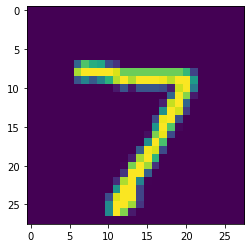

In [65]:
plt.imshow(X_test[0])

And then we can get the predictions for the entire test set by passing the predictions into the `argmax` function.

In [128]:
hard_predictions = torch.argmax(predictions_test, axis = 1)

And we can eyeball how well our first predictions match up with the labels. 

In [129]:
hard_predictions[:10]

tensor([7, 2, 1, 1, 2, 1, 2, 2, 8, 7])

In [130]:
y_test[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7], dtype=uint8)

Looking good so far.  Or we can see the percentage that it that it predicted correctly, by using the `accuracy_score` method from sklearn.

In [1]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, hard_predictions.cpu())

# 0.8881

So the output above is the percentage of our test set that it predicted correctly.  Not too bad for our first neural network.  If it's above .85 or so, that's not too bad.

### Summary

In this lesson, we trained a neural network in Pytorch.  Nice work!!  At this point, you should feel pretty good about the hypothesis function of a neural network, and somewhat ok about the training of a neural network.  In the next set of lessons we'll go deeper into training.  If you plan on working with neural networks in the future, this knowledge is pretty essential.  You'll need it to understand the fundamentals of neural networks, so that you can diagnose how neural networks can go wrong, as well as some of the developments in neural networks to remedy these issues.

### Resources

[Colab Deep Learning](https://colab.research.google.com/github/margaretmz/deep-learning/blob/master/fashion_mnist_keras.ipynb#scrollTo=d44TznbgZZgm)

[Log Softmax](https://stats.stackexchange.com/questions/436766/cross-entropy-with-log-softmax-activation)